In [7]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("Personal_Finance_Dataset.csv")

# Lấy danh sách category duy nhất và số lượng
unique_categories = df['Category'].unique()
num_categories = len(unique_categories)

print(f"Số lượng category: {num_categories}")
print("Danh sách các category:")
for cat in unique_categories:
    print("-", cat)

# Đếm số dòng mỗi loại category
print("\nSố dòng mỗi category:")
category_counts = df['Category'].value_counts()
print(category_counts)


Số lượng category: 10
Danh sách các category:
- Food & Drink
- Utilities
- Rent
- Investment
- Shopping
- Other
- Entertainment
- Health & Fitness
- Salary
- Travel

Số dòng mỗi category:
Category
Rent                165
Travel              160
Utilities           157
Health & Fitness    152
Shopping            150
Food & Drink        149
Salary              146
Entertainment       143
Investment          142
Other               136
Name: count, dtype: int64


In [8]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("Personal_Finance_Dataset.csv")

# Đếm số dòng theo từng loại Type (Income, Expense)
type_counts = df['Type'].value_counts()

print("Số dòng theo từng loại Type:")
print(type_counts)


Số dòng theo từng loại Type:
Type
Expense    1222
Income      278
Name: count, dtype: int64


In [9]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("Personal_Finance_Dataset.csv")

# Lọc các dòng có Type là "Income"
income_df = df[df['Type'] == 'Income']

# Lấy danh sách category không trùng
income_categories = income_df['Category'].unique()

# Hiển thị kết quả
print(f"Số category (hũ) trong các dòng 'Income': {len(income_categories)}")
print("Danh sách category trong dòng 'Income':")
for cat in income_categories:
    print("-", cat)


Số category (hũ) trong các dòng 'Income': 2
Danh sách category trong dòng 'Income':
- Investment
- Other


In [ ]:
 #"NEC", "FFA", "EDU", "LTSS", "PLAY" "GIVE", "HEALTH", "FAMILY", "EMERGENCY", "DREAM"

In [3]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("Personal_Finance_Dataset.csv")

# Tạo ánh xạ
category_map = {
    "Food & Drink": "NEC",
    "Utilities": "NEC",
    "Rent": "NEC",
    "Investment": "FFA",
    "Shopping": "NEC",
    "Other": "UNKNOWN",
    "Entertainment": "PLAY",
    "Health & Fitness": "HEALTH",
    "Salary": "INCOME",
    "Travel": "PLAY"
}

# Thay thế category theo mapping
df['Category'] = df['Category'].replace(category_map)

# Lưu lại nếu cần
df.to_csv("Personal_Finance_Dataset_mapped.csv", index=False)


In [16]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("Personal_Finance_Dataset_mapped.csv")

# Loại bỏ các dòng có Category là 'UNKNOWN'
df = df[df['Category'] != 'UNKNOWN']

# Bỏ các cột không cần
df = df.drop(columns=['Transaction Description', 'Type'])

# Chuyển cột Date về kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột Year-Month để tổng hợp theo tháng
df['Month'] = df['Date'].dt.to_period('M')  # hoặc .dt.strftime('%Y-%m') nếu muốn chuỗi

# Tổng hợp chi tiêu theo Category và theo Month
monthly_summary = df.groupby(['Month', 'Category'])['Amount'].sum().reset_index()
monthly_summary.to_csv("6_jars_monthly_spending.csv", index=False)
# Hiển thị kết quả
# print(monthly_summary)


In [10]:
import pandas as pd

# Đọc dữ liệu từ file
df = pd.read_csv("6_jars_monthly_spending.csv")

# Pivot để mỗi category là 1 cột, hàng là tháng
pivot_df = df.pivot(index='Month', columns='Category', values='Amount').fillna(0)

# Tính LTSS
pivot_df['LTSS'] = pivot_df['INCOME'] - (
    pivot_df.get('NEC', 0) +
    pivot_df.get('FFA', 0) +
    pivot_df.get('PLAY', 0) +
    pivot_df.get('HEALTH', 0)
)

# Đưa dữ liệu về dạng long (Month, Category, Amount)
result_df = pivot_df.reset_index().melt(id_vars='Month', var_name='Category', value_name='Amount')

# Sắp xếp nếu cần
result_df = result_df.sort_values(by=['Month', 'Category'])

# Lưu lại vào file (ghi đè hoặc tên mới)
result_df.to_csv("6_jars_monthly_spending_with_LTSS.csv", index=False)

print("✅ Đã thêm cột LTSS và lưu vào file mới.")


✅ Đã thêm cột LTSS và lưu vào file mới.


# test phân nhóm người dùng theo phân bố hũ

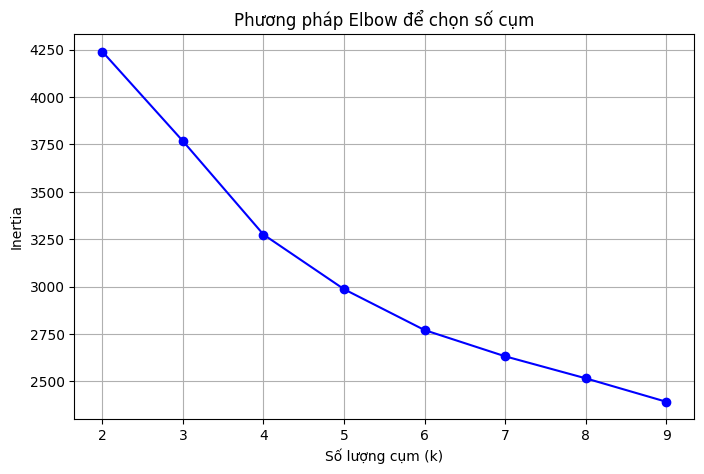

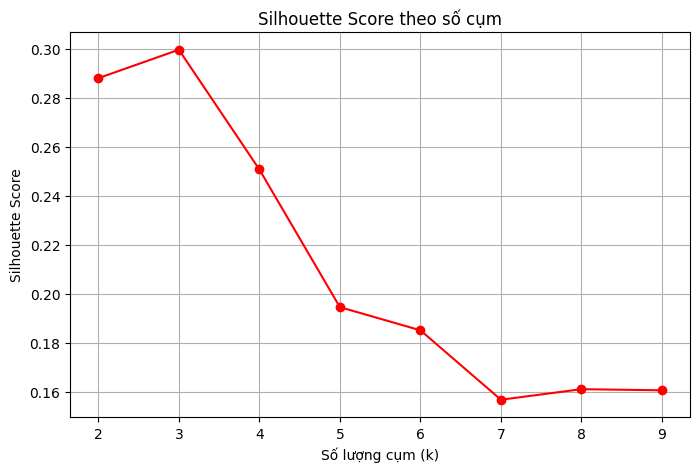


Tỷ trọng trung bình và phân bố thu nhập trong mỗi cụm:
               NEC        FFA        EDU       LTSS       PLAY  \
cluster                                                          
0        45.793173  13.202811   9.322289  12.228916  10.783133   
1        49.930556  14.821429  10.873016  10.962302  10.734127   
2        45.689655  11.781609   8.390805   9.425287   8.908046   
3        45.155697   9.373673   6.748054   7.947629   7.204529   

                                                income_bin  
cluster                                                     
0        {'15-20M': 89, '5-10M': 83, '10-15M': 70, '20-...  
1        {'15-20M': 44, '5-10M': 43, '10-15M': 37, '20-...  
2        {'70-75M': 7, '50-55M': 4, '45-50M': 4, '65-70...  
3        {'15-20M': 133, '5-10M': 117, '10-15M': 91, '2...  

Kết quả phân cụm đã được lưu vào 'user_clusters_with_income.csv'.


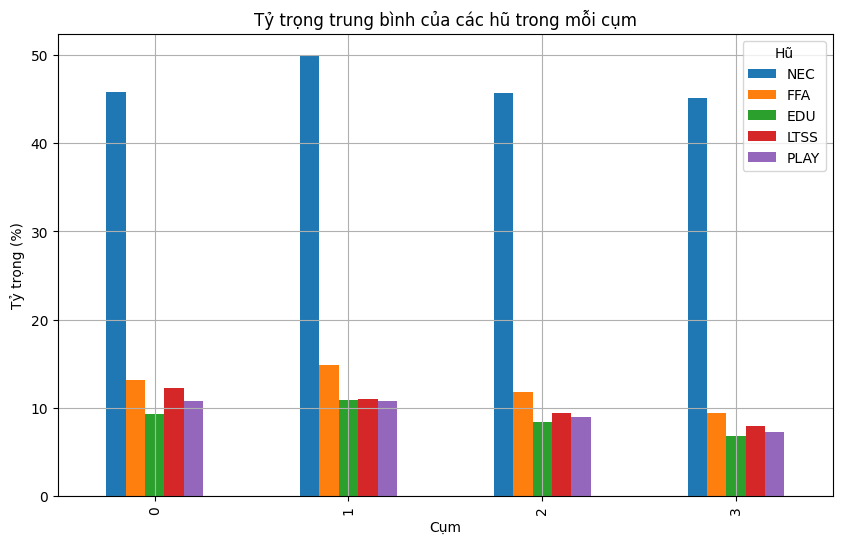

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('jars_distribution_with_actual.csv')

# Lọc chỉ các hũ chính
core_jars = ["NEC", "FFA", "EDU", "LTSS", "PLAY"]
data_core = data[data['jar'].isin(core_jars)]

# Tạo bảng pivot: trung bình tỷ trọng qua các tháng cho mỗi user_id
pivot_percent = data_core.pivot_table(
    values='percent',
    index='user_id',
    columns='jar',
    aggfunc='mean'
).fillna(0)

# Kiểm tra xem tất cả core_jars có trong dữ liệu không
for jar in core_jars:
    if jar not in pivot_percent.columns:
        pivot_percent[jar] = 0

# Tính trung bình income cho mỗi user_id
pivot_income = data_core.groupby('user_id')['income'].mean().reset_index()

# Phân khoảng income (bước 5 triệu)
bins = np.arange(0, pivot_income['income'].max() + 5000000, 5000000)
labels = [f'{int(i/1000000)}-{int((i+5000000)/1000000)}M' for i in bins[:-1]]
pivot_income['income_bin'] = pd.cut(pivot_income['income'], bins=bins, labels=labels, include_lowest=True)

# Mã hóa income_bin thành số (ví dụ: 0-5M -> 0, 5-10M -> 1, ...)
pivot_income['income_bin_encoded'] = pd.Categorical(pivot_income['income_bin']).codes

# Kết hợp dữ liệu: tỷ trọng + income_bin_encoded
pivot_data = pivot_percent[core_jars].merge(
    pivot_income[['user_id', 'income_bin', 'income_bin_encoded']],
    on='user_id'
)

# Tạo vector đặc trưng
features = pivot_data[core_jars + ['income_bin_encoded']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Xác định số cụm tối ưu bằng phương pháp Elbow
inertia = []
silhouette_scores = []
K = range(2, min(10, len(pivot_data) + 1))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    if k > 1 and len(np.unique(kmeans.labels_)) > 1:
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    else:
        silhouette_scores.append(0)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để chọn số cụm')
plt.grid(True)
plt.show()

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm')
plt.grid(True)
plt.show()

# Chọn số cụm tối ưu (dựa trên Elbow hoặc Silhouette)
optimal_k = 4  # Điều chỉnh dựa trên biểu đồ
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pivot_data['cluster'] = kmeans.fit_predict(scaled_data)

# In thông tin về các cụm
print("\nTỷ trọng trung bình và phân bố thu nhập trong mỗi cụm:")
cluster_summary = pivot_data.groupby('cluster')[core_jars + ['income_bin']].agg({
    **{jar: 'mean' for jar in core_jars},
    'income_bin': lambda x: x.value_counts().to_dict()
})
print(cluster_summary)

# Lưu kết quả phân cụm
pivot_data[['user_id', 'cluster', 'income_bin']].to_csv('user_clusters_with_income.csv', index=False)
print("\nKết quả phân cụm đã được lưu vào 'user_clusters_with_income.csv'.")

# Trực quan hóa: Tỷ trọng trung bình của mỗi hũ trong mỗi cụm
cluster_summary[core_jars].plot(kind='bar', figsize=(10, 6))
plt.title('Tỷ trọng trung bình của các hũ trong mỗi cụm')
plt.xlabel('Cụm')
plt.ylabel('Tỷ trọng (%)')
plt.legend(title='Hũ')
plt.grid(True)
plt.show()


Tỷ trọng trung bình và phân bố thu nhập trong mỗi cụm:
               NEC        FFA        EDU       LTSS       PLAY  \
cluster                                                          
0        45.793173  13.202811   9.322289  12.228916  10.783133   
1        49.930556  14.821429  10.873016  10.962302  10.734127   
2        45.689655  11.781609   8.390805   9.425287   8.908046   
3        45.155697   9.373673   6.748054   7.947629   7.204529   

                                                income_bin  
cluster                                                     
0        {'15-20M': 89, '5-10M': 83, '10-15M': 70, '20-...  
1        {'15-20M': 44, '5-10M': 43, '10-15M': 37, '20-...  
2        {'70-75M': 7, '50-55M': 4, '45-50M': 4, '65-70...  
3        {'15-20M': 133, '5-10M': 117, '10-15M': 91, '2...  

Kết quả phân cụm đã được lưu vào 'user_clusters_with_income.csv'.


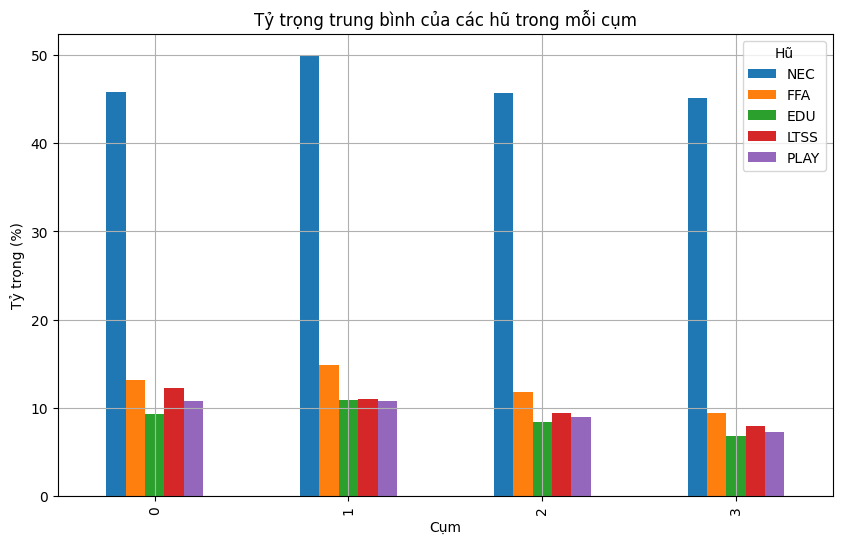

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('jars_distribution_with_actual.csv')

# Lọc chỉ các hũ chính
core_jars = ["NEC", "FFA", "EDU", "LTSS", "PLAY"]
data_core = data[data['jar'].isin(core_jars)]

# Tạo bảng pivot: trung bình tỷ trọng qua các tháng cho mỗi user_id
pivot_percent = data_core.pivot_table(
    values='percent',
    index='user_id',
    columns='jar',
    aggfunc='mean'
).fillna(0)

# Kiểm tra xem tất cả core_jars có trong dữ liệu không
for jar in core_jars:
    if jar not in pivot_percent.columns:
        pivot_percent[jar] = 0

# Tính trung bình income cho mỗi user_id
pivot_income = data_core.groupby('user_id')['income'].mean().reset_index()

# Phân khoảng income (bước 5 triệu)
bins = np.arange(0, pivot_income['income'].max() + 5000000, 5000000)
labels = [f'{int(i/1000000)}-{int((i+5000000)/1000000)}M' for i in bins[:-1]]
pivot_income['income_bin'] = pd.cut(pivot_income['income'], bins=bins, labels=labels, include_lowest=True)

# Mã hóa income_bin thành số
pivot_income['income_bin_encoded'] = pd.Categorical(pivot_income['income_bin']).codes

# Kết hợp dữ liệu: tỷ trọng + income_bin_encoded
pivot_data = pivot_percent[core_jars].merge(
    pivot_income[['user_id', 'income_bin', 'income_bin_encoded']],
    on='user_id'
)

# Tạo vector đặc trưng
features = pivot_data[core_jars + ['income_bin_encoded']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Phân cụm với optimal_k = 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pivot_data['cluster'] = kmeans.fit_predict(scaled_data)

# In thông tin về các cụm
print("\nTỷ trọng trung bình và phân bố thu nhập trong mỗi cụm:")
cluster_summary = pivot_data.groupby('cluster')[core_jars + ['income_bin']].agg({
    **{jar: 'mean' for jar in core_jars},
    'income_bin': lambda x: x.value_counts().to_dict()
})
print(cluster_summary)

# Lưu kết quả phân cụm
pivot_data[['user_id', 'cluster', 'income_bin']].to_csv('user_clusters_with_income.csv', index=False)
print("\nKết quả phân cụm đã được lưu vào 'user_clusters_with_income.csv'.")

# Trực quan hóa: Tỷ trọng trung bình của mỗi hũ trong mỗi cụm
cluster_summary[core_jars].plot(kind='bar', figsize=(10, 6))
plt.title('Tỷ trọng trung bình của các hũ trong mỗi cụm')
plt.xlabel('Cụm')
plt.ylabel('Tỷ trọng (%)')
plt.legend(title='Hũ')
plt.grid(True)
plt.show()

In [3]:
import pandas as pd

# Đọc file user_clusters_with_income.csv
clusters_df = pd.read_csv('user_clusters_with_income.csv')

# Đọc file dữ liệu gốc để lấy thông tin income
data_df = pd.read_csv('jars_distribution_with_actual.csv')

# Tính trung bình income cho mỗi user_id từ dữ liệu gốc
income_df = data_df.groupby('user_id')['income'].mean().reset_index()

# Kết hợp dữ liệu clusters với income
merged_df = clusters_df.merge(income_df, on='user_id', how='left')

# Nhóm theo cluster và tính thu nhập trung bình
cluster_summary = merged_df.groupby('cluster').agg({
    'income': 'mean',  # Thu nhập trung bình
    'income_bin': lambda x: x.value_counts().to_dict()  # Phân bố khoảng thu nhập
}).rename(columns={'income': 'mean_income'})

# In kết quả
print("Thu nhập trung bình và khoảng thu nhập của từng cụm:")
print(cluster_summary)

# Định dạng thêm để dễ đọc
for cluster, row in cluster_summary.iterrows():
    print(f"\nCụm {cluster}:")
    print(f"- Thu nhập trung bình: {row['mean_income']:,.0f} VND")
    print("- Khoảng thu nhập:", end=" ")
    for bin_range, count in row['income_bin'].items():
        print(f"{bin_range} ({count} người), ", end="")
    print()  # Dòng mới sau mỗi cụm

Thu nhập trung bình và khoảng thu nhập của từng cụm:
          mean_income                                         income_bin
cluster                                                                 
0        1.628584e+07  {'15-20M': 89, '5-10M': 83, '10-15M': 70, '20-...
1        1.635119e+07  {'15-20M': 44, '5-10M': 43, '10-15M': 37, '20-...
2        6.215172e+07  {'70-75M': 7, '50-55M': 4, '65-70M': 4, '45-50...
3        1.643206e+07  {'15-20M': 133, '5-10M': 117, '10-15M': 91, '2...

Cụm 0:
- Thu nhập trung bình: 16,285,843 VND
- Khoảng thu nhập: 15-20M (89 người), 5-10M (83 người), 10-15M (70 người), 20-25M (37 người), 25-30M (35 người), 35-40M (9 người), 30-35M (6 người), 0-5M (3 người), 

Cụm 1:
- Thu nhập trung bình: 16,351,190 VND
- Khoảng thu nhập: 15-20M (44 người), 5-10M (43 người), 10-15M (37 người), 20-25M (17 người), 25-30M (13 người), 30-35M (8 người), 35-40M (5 người), 40-45M (1 người), 

Cụm 2:
- Thu nhập trung bình: 62,151,724 VND
- Khoảng thu nhập: 70-75M (7 người), 

In [4]:
from joblib import dump
dump(scaler, 'scaler.joblib')
dump(kmeans, 'kmeans.joblib')

['kmeans.joblib']

# phân loại người dùng mới

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from joblib import load
# Giả định các biến đã được lưu từ quá trình huấn luyện
# Thay thế bằng cách tải từ file nếu cần (ví dụ: joblib hoặc pickle)

scaler = load('scaler.joblib')
kmeans = load('kmeans.joblib')

# Hàm phân loại người dùng mới
def classify_new_user(percent_dict, income, core_jars=["NEC", "FFA", "EDU", "LTSS", "PLAY"]):
    # Tạo DataFrame từ dữ liệu người dùng mới
    user_data = pd.DataFrame([percent_dict])
    user_data = user_data.reindex(columns=core_jars, fill_value=0)  # Đảm bảo tất cả hũ chính có giá trị
    
    # Thêm income và phân khoảng
    bins = np.arange(0, int(income) + 5000000, 5000000)
    labels = [f'{int(i/1000000)}-{int((i+5000000)/1000000)}M' for i in bins[:-1]]
    income_bin = pd.cut([income], bins=bins, labels=labels, include_lowest=True)[0]
    income_bin_encoded = pd.Categorical([income_bin]).codes[0]
    
    # Kết hợp dữ liệu
    user_features = user_data[core_jars].values
    user_features = np.column_stack((user_features, [income_bin_encoded]))
    
    # Chuẩn hóa dữ liệu bằng scaler đã huấn luyện
    user_features_scaled = scaler.transform(user_features)
    
    # Dự đoán cụm
    cluster_label = kmeans.predict(user_features_scaled)[0]
    
    return cluster_label, income_bin

# Ví dụ sử dụng
if __name__ == "__main__":
    # Dữ liệu mẫu của người dùng mới
    new_user_percent = {
        "NEC": 50,
        "FFA": 20,
        "EDU": 5,
        "LTSS": 5,
        "PLAY": 15
    }
    new_user_income = 2700000  # Ví dụ thu nhập
    
    # Phân loại
    cluster, income_bin = classify_new_user(new_user_percent, new_user_income)
    print(f"Người dùng mới được phân vào cụm {cluster} với thu nhập trong khoảng {income_bin}")

Người dùng mới được phân vào cụm 1 với thu nhập trong khoảng 20-25M


c:\Users\ASUS\Desktop\vpbank_hackathon\vpbank_venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
